In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the .parquet files
behaviors_train = pd.read_parquet("dataset/train/behaviors.parquet")
history_train = pd.read_parquet("dataset/train/history.parquet")
articles = pd.read_parquet("dataset/articles.parquet")
document_vector = pd.read_parquet("dataset/document_vector.parquet")

In [2]:
behaviors_train.dtypes

impression_id                     uint32
article_id                       float64
impression_time           datetime64[us]
read_time                        float32
scroll_percentage                float32
device_type                         int8
article_ids_inview                object
article_ids_clicked               object
user_id                           uint32
is_sso_user                         bool
gender                           float64
postcode                         float64
age                              float64
is_subscriber                       bool
session_id                        uint32
next_read_time                   float32
next_scroll_percentage           float32
dtype: object

In [3]:
# Display the first few rows
behaviors_train.head()

,impression_id,article_id,impression_time,read_time,scroll_percentage,device_type,article_ids_inview,article_ids_clicked,user_id,is_sso_user,gender,postcode,age,is_subscriber,session_id,next_read_time,next_scroll_percentage
0,149474,NaN,2023-05-24 07:47:53,13.0,NaN,2,"[9778623, 9778682, 9778669, 9778657, 9778736, ...",[9778657],139836,False,NaN,NaN,NaN,False,759,7.0,22.0
1,150528,NaN,2023-05-24 07:33:25,25.0,NaN,2,"[9778718, 9778728, 9778745, 9778669, 9778657, ...",[9778623],143471,False,NaN,NaN,NaN,False,1240,287.0,100.0
2,153068,9778682.0,2023-05-24 07:09:04,78.0,100.0,1,"[9778657, 9778669, 9772866, 9776259, 9756397, ...",[9778669],151570,False,NaN,NaN,NaN,False,1976,45.0,100.0
3,153070,9777492.0,2023-05-24 07:13:14,26.0,100.0,1,"[9020783, 9778444, 9525589, 7213923, 9777397, ...",[9778628],151570,False,NaN,NaN,NaN,False,1976,4.0,18.0
4,153071,9778623.0,2023-05-24 07:11:08,125.0,100.0,1,"[9777492, 9774568, 9565836, 9335113, 9771223, ...",[9777492],151570,False,NaN,NaN,NaN,False,1976,26.0,100.0


In [4]:
# Display the first few rows
history_train.head()

,user_id,impression_time_fixed,scroll_percentage_fixed,article_id_fixed,read_time_fixed
0,13538,"[2023-04-27T10:17:43.000000, 2023-04-27T10:18:...","[100.0, 35.0, 100.0, 24.0, 100.0, 23.0, 100.0,...","[9738663, 9738569, 9738663, 9738490, 9738663, ...","[17.0, 12.0, 4.0, 5.0, 4.0, 9.0, 5.0, 46.0, 11..."
1,14241,"[2023-04-27T09:40:18.000000, 2023-04-27T09:40:...","[100.0, 46.0, 100.0, 70.0, 100.0, 100.0, 100.0...","[9738557, 9738528, 9738533, 9738684, 9739035, ...","[8.0, 9.0, 28.0, 17.0, 91.0, 21.0, 14.0, 27.0,..."
2,20396,"[2023-04-27T12:30:44.000000, 2023-04-27T12:31:...","[100.0, 59.0, nan, nan, 100.0, 100.0, nan, nan...","[9738760, 9738355, 9738355, 9739864, 9741788, ...","[49.0, 34.0, 0.0, 60.0, 180.0, 49.0, 0.0, 0.0,..."
3,34912,"[2023-04-29T07:12:49.000000, 2023-04-29T13:01:...","[100.0, 35.0, 44.0, 31.0, 100.0, 100.0, 100.0,...","[9741802, 9741804, 9741803, 9740087, 9742039, ...","[153.0, 7.0, 5.0, 6.0, 44.0, 44.0, 108.0, 10.0..."
4,37953,"[2023-04-27T19:17:10.000000, 2023-04-27T19:17:...","[14.0, 28.0, 29.0, nan, 36.0, 33.0, 50.0, 100....","[9739205, 9739202, 9737084, 9739274, 9739358, ...","[4.0, 16.0, 4.0, 0.0, 5.0, 5.0, 25.0, 48.0, 6...."


In [5]:
history_train.dtypes

user_id                    uint32
impression_time_fixed      object
scroll_percentage_fixed    object
article_id_fixed           object
read_time_fixed            object
dtype: object

In [2]:
document_vector.head()

,article_id,document_vector
0,3000022,"[0.06542388, -0.047424573, 0.06384871, -0.0014..."
1,3000063,"[0.028815078, -0.00016637295, 0.055056807, 0.0..."
2,3000613,"[0.037971217, 0.03392251, 0.027297212, 0.01708..."
3,3000700,"[0.04652399, 0.0029133065, 0.06280604, -0.0051..."
4,3000840,"[0.014736942, 0.024067875, 0.0051865038, 0.041..."


In [3]:
document_vector.describe()

,article_id
count,1.255410e+05
mean,7.408473e+06
std,2.144212e+06
min,3.000022e+06
25%,5.249139e+06
50%,8.043074e+06
75%,9.455107e+06
max,9.803607e+06


In [4]:
articles.describe()

,article_id,last_modified_time,published_time,category,total_inviews,total_pageviews,total_read_time,sentiment_score
count,2.073800e+04,20738,20738,20738.000000,9.968000e+03,9.856000e+03,9.856000e+03,20738.000000
mean,8.779823e+06,2023-06-30 18:38:02.157778,2021-04-06 17:43:51.156669,488.540602,3.548798e+05,6.215521e+04,3.767574e+06,0.824983
min,3.001353e+06,2023-06-29 06:20:33,1998-12-27 12:05:00,2.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.344900
25%,8.834722e+06,2023-06-29 06:43:39,2021-09-13 03:30:00,140.000000,1.592088e+05,1.280450e+04,6.675798e+05,0.693200
50%,9.609904e+06,2023-06-29 06:48:06,2023-02-01 12:02:36.500000,142.000000,3.377975e+05,4.933200e+04,2.767553e+06,0.870400
75%,9.745302e+06,2023-06-29 06:48:55,2023-05-02 10:12:09.500000,498.000000,4.828422e+05,9.219950e+04,5.252836e+06,0.972600
max,9.803607e+06,2024-01-25 05:15:50,2023-07-11 05:05:36,2975.000000,4.138598e+06,1.637751e+06,2.181756e+08,0.998300
std,1.668318e+06,NaN,NaN,726.482571,3.114681e+05,6.370662e+04,4.988664e+06,0.157419


In [6]:
behaviors_train.describe()

,impression_id,article_id,impression_time,read_time,scroll_percentage,device_type,user_id,gender,postcode,age,session_id,next_read_time,next_scroll_percentage
count,2.328870e+05,7.042100e+04,232887,232887.000000,69098.000000,232887.000000,2.328870e+05,16219.000000,4673.000000,6341.000000,2.328870e+05,226669.000000,206617.000000
mean,2.882795e+08,9.765423e+06,2023-05-21 16:43:32.126653,43.901806,99.566208,1.685521,1.313502e+06,0.107590,1.438048,55.013405,9.891061e+05,68.649857,69.112617
min,1.494740e+05,3.198681e+06,2023-05-18 07:00:01,0.000000,7.000000,1.000000,1.006800e+04,0.000000,0.000000,0.000000,4.060000e+02,0.000000,0.000000
25%,1.420387e+08,9.772032e+06,2023-05-19 18:51:21,11.000000,100.000000,1.000000,6.866610e+05,0.000000,0.000000,50.000000,5.002430e+05,7.000000,36.000000
50%,2.903336e+08,9.774297e+06,2023-05-21 16:46:53,21.000000,100.000000,2.000000,1.328699e+06,0.000000,1.000000,60.000000,9.911210e+05,21.000000,80.000000
75%,4.331661e+08,9.776882e+06,2023-05-23 10:46:52.500000,45.000000,100.000000,2.000000,1.954176e+06,0.000000,3.000000,60.000000,1.477665e+06,62.000000,100.000000
max,5.801007e+08,9.780271e+06,2023-05-25 06:59:58,1799.000000,100.000000,3.000000,2.590637e+06,1.000000,4.000000,90.000000,2.030118e+06,1799.000000,100.000000
std,1.683194e+08,1.296827e+05,NaN,90.299965,4.944662,0.519545,7.370205e+05,0.309871,1.436164,13.891898,5.682560e+05,172.633560,32.253510


In [7]:
history_train.describe()

,user_id
count,1.514300e+04
mean,1.305125e+06
std,7.425132e+05
min,1.006800e+04
25%,6.670550e+05
50%,1.311197e+06
75%,1.953018e+06
max,2.590637e+06


In [10]:
history_train.size, behaviors_train.size, articles.size, document_vector.size

(75715, 3959079, 435498, 251082)

In [11]:
articles.columns

Index(['article_id', 'title', 'subtitle', 'last_modified_time', 'premium',
       'body', 'published_time', 'image_ids', 'article_type', 'url',
       'ner_clusters', 'entity_groups', 'topics', 'category', 'subcategory',
       'category_str', 'total_inviews', 'total_pageviews', 'total_read_time',
       'sentiment_score', 'sentiment_label'],
      dtype='object')

## Some analysis on "articles" table

Descriptive Statistics:
       total_inviews  total_pageviews  total_read_time  sentiment_score
count   9.855000e+03     9.855000e+03     9.855000e+03      9855.000000
mean    3.589487e+05     6.216151e+04     3.767957e+06         0.834246
std     3.109088e+05     6.370677e+04     4.988772e+06         0.157055
min     1.000000e+00     1.000000e+00     0.000000e+00         0.360400
25%     1.700295e+05     1.282650e+04     6.684310e+05         0.714300
50%     3.408090e+05     4.934100e+04     2.767916e+06         0.887700
75%     4.849680e+05     9.220200e+04     5.253170e+06         0.976000
max     4.138598e+06     1.637751e+06     2.181756e+08         0.998200


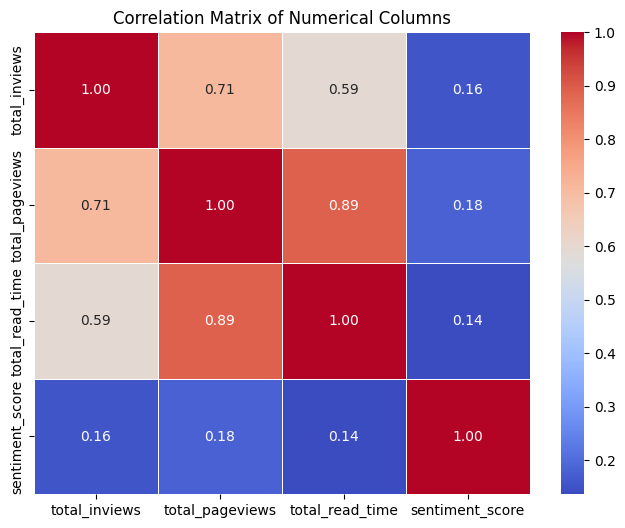

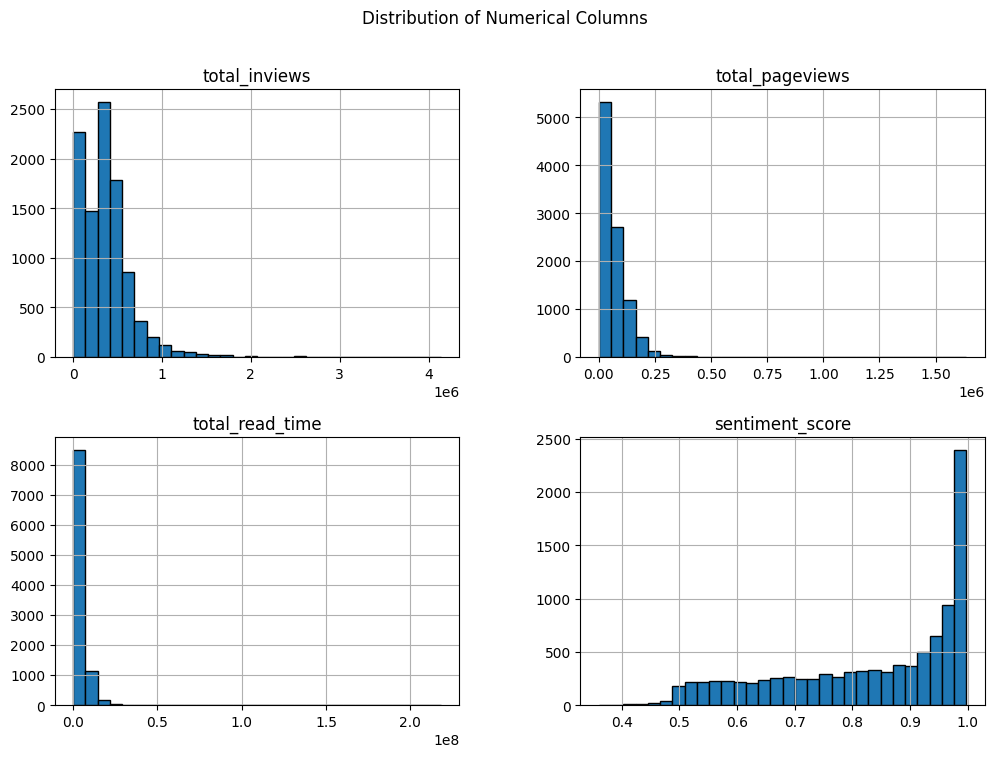

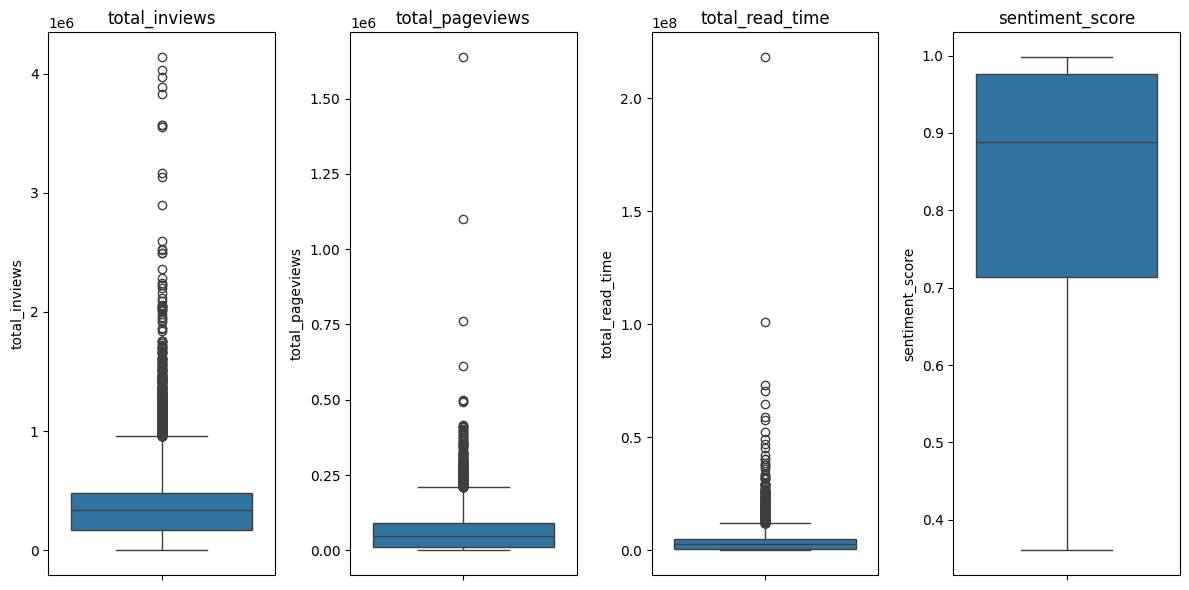

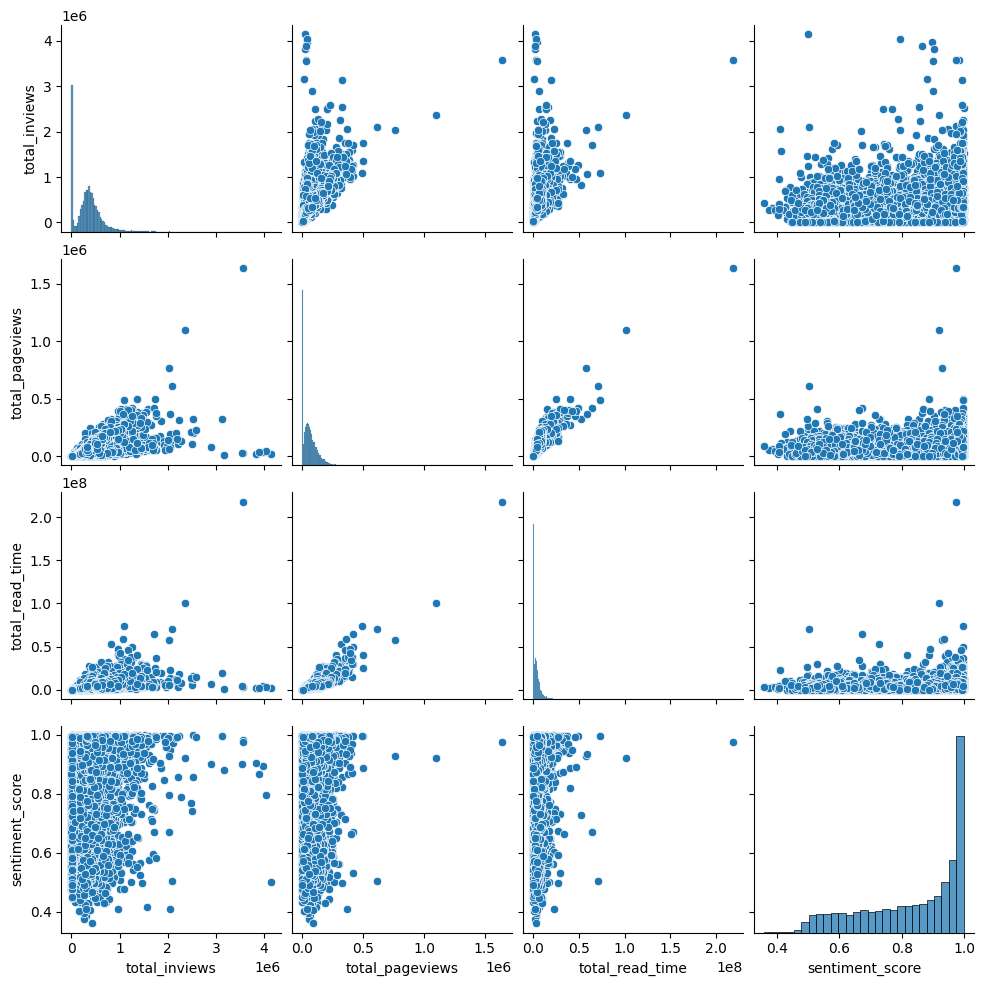

In [18]:
# Select numerical columns
num_cols = ["total_inviews", "total_pageviews", "total_read_time", "sentiment_score"]

# Drop rows with missing values in numerical columns
df_numeric = articles[num_cols].dropna()

# Summary statistics
print("Descriptive Statistics:")
print(df_numeric.describe())

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

# Histograms of numerical features
df_numeric.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Columns")
plt.show()

# Box plots to check for outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.boxplot(y=df_numeric[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Pairplot to check relationships
sns.pairplot(df_numeric)
plt.show()